In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
model = 'Lorenz63'
da_method = 'EnKF'
df = pd.read_csv('./' + model + '_' + da_method + '.csv')

In [23]:
df

,timestep,x_true,y_true,z_true,x_sim,y_sim,z_sim,x_da,y_da,z_da,x_obs,y_obs
0,0.00,0.000000,10.000000,20.000000,3.000000,13.000000,13.000000,2.996903,2.996903,2.996903,None,None
1,0.05,3.974004,10.470530,18.537555,7.502488,16.042735,15.030470,7.492137,16.010822,15.029639,None,None
2,0.10,6.916687,12.448457,19.188226,11.728991,19.925029,21.426872,11.698831,19.832334,21.424889,None,None
3,0.15,9.616634,14.850631,22.148285,15.154811,19.816053,31.788821,15.085453,19.671244,31.676948,None,None
4,0.20,11.974400,15.868959,27.324587,15.600373,12.345565,39.963700,11.987623,15.986431,38.499805,11.80,16.00
5,0.25,13.158802,13.690046,32.867020,12.245007,3.020427,39.969945,11.891939,8.036862,40.585540,None,None
6,0.30,12.382207,8.869207,35.640688,7.413800,-1.853226,35.123495,8.912945,1.715908,37.827448,None,None
7,0.35,9.984532,4.366882,34.616637,3.445992,-3.011339,30.106271,5.393526,-1.033995,33.181884,None,None
8,0.40,7.193353,1.974796,31.505801,0.914326,-2.904892,26.061017,7.067803,1.880247,29.088979,7.17,1.88
9,0.45,4.962804,1.338797,28.010766,-0.550078,-2.763139,22.794012,5.004129,1.909142,25.962912,None,None


In [24]:
timestep = df[' timestep'].tolist()

In [25]:
x_true, y_true, z_true = df[' x_true'].tolist(), df[' y_true'].tolist(), df[' z_true'].tolist()
x_sim, y_sim, z_sim = df[' x_sim'].tolist(), df[' y_sim'].tolist(), df[' z_sim'].tolist()
x_da, y_da, z_da = df[' x_da'].tolist(), df[' y_da'].tolist(), df[' z_da'].tolist()

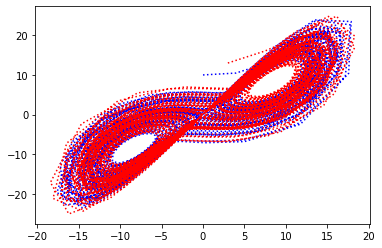

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_true[:], y_true[:], 'b:', label='True')
ax.plot(x_sim[:], y_sim[:], 'r:', label='True')

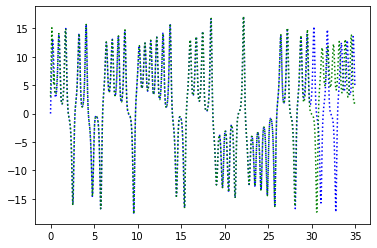

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
time_step = 700
ax.plot(timestep[:time_step], x_true[:time_step], 'b:', label='True')
#ax.plot(timestep[:time_step], x_sim[:time_step], 'r:', label='Sim')
ax.plot(timestep[:time_step], x_da[:time_step], 'g:', label='Sim')